In [13]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [5]:
fetch_openml("mnist_784")

KeyboardInterrupt: 

In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [8]:
noisy_digits = X+np.random.normal(0,4,size= X.shape)

In [10]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num=noisy_digits[y==num,:][:10]
    example_digits=np.vstack([example_digits,X_num])

In [11]:
example_digits.shape

(100, 64)

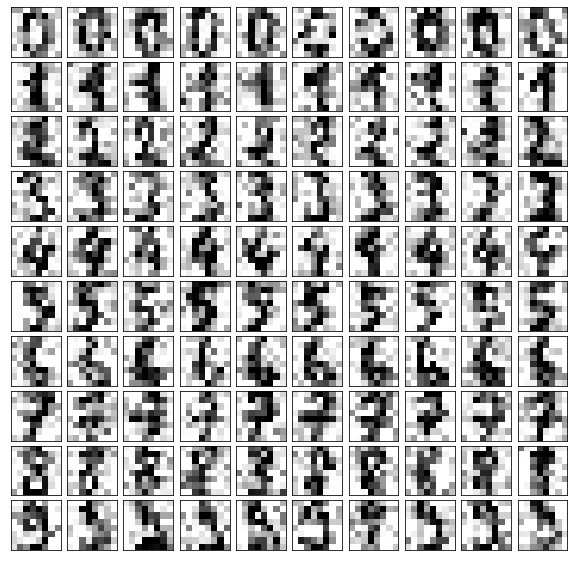

In [16]:
def plot_digits(data):
    fig,axes=plt.subplots(10,10,figsize=(10,10),
                         subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                cmap='binary',interpolation='nearest',
                clim=(0,16))
    plt.show()
plot_digits(example_digits)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca=PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [23]:
pca.n_components_

12

In [24]:
components=pca.transform(example_digits)
filtered_digits=pca.inverse_transform(components)

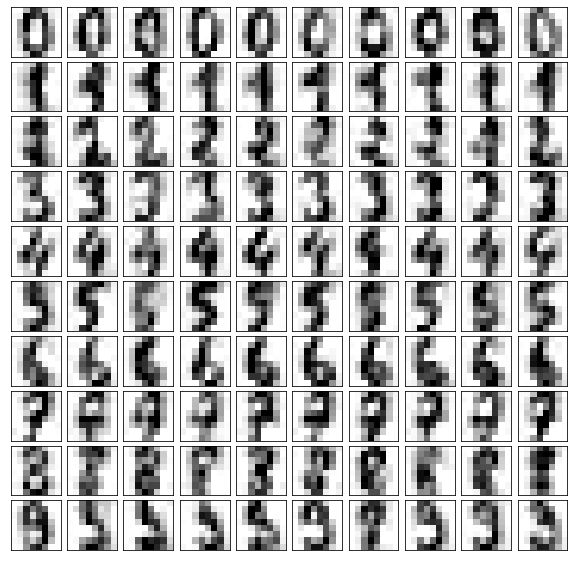

In [25]:
plot_digits(filtered_digits)